# EX3 고양이 수염 스티커 붙이기

In [175]:
# 필요한 모듈 불러오기
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


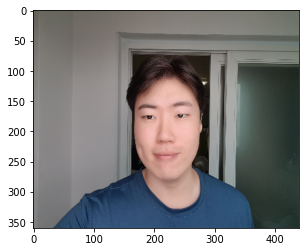

In [265]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/self9.png'
img_bgr = cv2.imread(my_image_path)  
img_bgr = cv2.resize(img_bgr, (440, 360))   
# 440x360의 크기로 Resize하기 때문에 가로방향 사진 선택

img_show = img_bgr.copy()     
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# BGR 이미지를 RGB로 변환
plt.imshow(img_rgb)
plt.show()

In [266]:
import dlib
detector_hog = dlib.get_frontal_face_detector()  
print("🌫🛸")

🌫🛸


In [267]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  
# detector_hog를 이용해서 얼굴의 bounding box를 추출
print("🌫🛸")

🌫🛸


rectangles[[(153, 139) (282, 268)]]


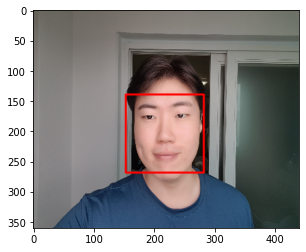

In [268]:
print(dlib_rects) 

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,0,255), 2, lineType=cv2.LINE_AA)
# 얼굴의 좌표와 빨간색으로 영역 표시
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [269]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [270]:
# top-down 방식을 써서 bounding box를 찾고 box 내부의 keypoint를 예측
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
# 잘려진 얼굴 이미지에서 68개의 랜드마크

68


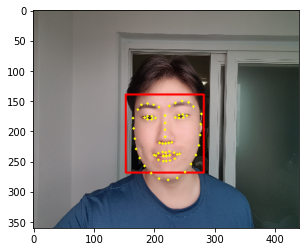

In [271]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()
# 다행히 눈썹에서 턱까지 랜드마크가 잘찍힌것을 확인할 수 있다.

In [272]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1]
    # 코의 중심이 인덱스 30에 위치
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(218, 209)
(x,y) : (218,209)
(w,h) : (130,130)


In [273]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)

img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(130, 130, 3)


In [274]:
refined_x = x -w // 2  # left
refined_y = y -h // 2    # top
# 수염은 2, 36, 48, 30번 인덱스 사이에 볼에 붙어야 하므로... 계산을 하거나, 열심히 대입해본다.
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (153,144)


In [275]:
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0
# 여기서 if를 이용해서 y의 좌표값이 음수가 될때만 0으로 수정해준다.
print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(130, 130, 3)
(x,y) : (153,144)


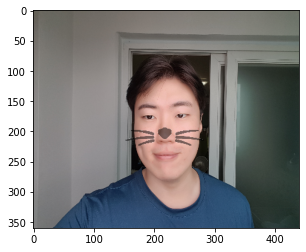

In [276]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8),0.5 , 0)
# cv2의 addWeighted를 사용해서 불투명도를 주었다.
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 고찰

### 고민을 했던 부분
#### 1. 얼굴영역을 찾지 못해서 9번의 인물 사진을 교체한 결과 윤곽이 어느정도 들어나있고, 턱과 목의 경계인 음영이 구분이 되어 있어야 정확히 경계를 인식한다는 것을 알게되었다.
#### 2. 사진을 resize 할때 가로 방향 440을 주기 때문에 어색하지 않도록 가로 방향 사진을 선택하면 좋다.
#### 3. 5명이 있는 사진을 시도 했으나, 얼굴들은 인식하지만 랜드마크가 붙지 않았다.
#### 4. 정면이 아닌 사진들은 스티커도 좌,우로 회전해야 한다.
#### 5. 인덱스들을 이용해서 스티커를 올바른 위치에 붙여야한다.
## 문제들을 해결하지 못하고, 쉬운 사진으로 진행.
***************************
### 가장 어려운 부분
#### 랜드마크까지는 쉽지만, 스티커의 올바른 위치를 잡는 것이 굉장히 어려웠다. refined_y = 0 이라는 부분을 if로 바꿔주고, h를 2로 나눠 빼야하는것은 여러번의 대입 끝에 찾아낼 수 있었다.
#### 고양이 수염을 제대로 붙였지만, 투명하게 하고 싶어서 열심히 찾아본 끝에 해낼수 있었다. (정확하게 이해는 못했지만, 해내니 짜릿했다.)
